# Creating BA categories for first and last 9 years separately, for comparison

This will then be used for analysis in separate files

In [1]:
# Import libraries

import os
import glob
from osgeo import gdal
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import scipy.ndimage
import pandas as pd
import datetime as dt
import rasterio as rio
import re
import geopandas as gpd
import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es
import earthpy.mask as em
from pyhdf.SD import SD, SDC
import pprint
import matplotlib.colors as colors 
from mpl_toolkits.axes_grid1 import make_axes_locatable 
import csv
import pprint
import h5py 
import gdal
from gdalconst import *

<ipython-input-2-c9cda0870a79>:19: MatplotlibDeprecationWarning: In a future version, 'pad' will default to rcParams['figure.subplot.wspace'].  Set pad=0 to keep the old behavior.
  cax = divider.append_axes("right", size ="5 %")


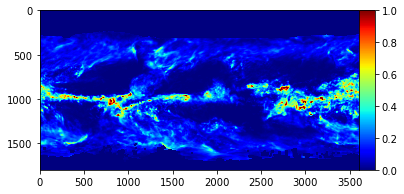

In [2]:
# Set input directory, and change working directory - plug in D:
inDir = "D:\\masters_data\\rainfall"   # I should change this so I can work from github?
os.chdir(inDir)                                                               # Change to working directory
outDir = os.path.normpath(os.path.split(inDir)[0] + os.sep + 'output') + '\\' # Create and set output directory
if not os.path.exists(outDir): os.makedirs(outDir)
    
# select first MODIS file
IMERGFiles = glob.glob('*IMERG*')
IMERG = h5py.File(IMERGFiles[8], 'r')

precipitation = IMERG['/Grid/precipitation/'][:]
precipitation = np.transpose(precipitation)
latitude = IMERG['/Grid/lat'] [:]
longitude = IMERG['/Grid/lon'][::]

fig, axes = plt.subplots() 
img = axes.imshow(precipitation, vmin =0,vmax = 1, cmap = "jet")
divider = make_axes_locatable(axes) 
cax = divider.append_axes("right", size ="5 %")
color_bar = plt.colorbar(img, cax = cax) 

In [3]:
# Set input directory, and change working directory - plug in D drive
inDir = "D:\\masters_data\\MODIS_BA" 
os.chdir(inDir)                                                               # Change to working directory
outDir = os.path.normpath(os.path.split(inDir)[0] + os.sep + 'output') + '\\' # Create and set output directory
if not os.path.exists(outDir): os.makedirs(outDir)

In [19]:
# select MODIS files
MODISFiles = glob.glob('*h19v08*') 
print(len(MODISFiles))
# print(MODISFiles[0])

216


In [20]:
First_MODISFiles = MODISFiles[:108]
Second_MODISFiles = MODISFiles[108:]

In [21]:
# create BA array for first 9 years (2002 - 2010)
first_BA = np.zeros((2400, 2400))
NUMBER = 0

for j in First_MODISFiles:
    filename= First_MODISFiles[NUMBER]
    dataset = gdal.Open(filename,GA_ReadOnly)
    subdataset = dataset.GetSubDatasets()[1]
    
    with rio.open(First_MODISFiles[NUMBER]) as dataset:
        crs = dataset.read_crs()
    
    file_name = First_MODISFiles[NUMBER]
    file = SD(file_name, SDC.READ)   
    
    datasets_dic = file.datasets()
    sds_obj = file.select(0)
    data = sds_obj.get() 
    result = np.where(data > 0)
    
    first_BA[result] += 1
    
    NUMBER += 1


In [22]:
# create BA array for second 9 years (2011 - 2018)
second_BA = np.zeros((2400, 2400))
NUMBER = 0

for j in Second_MODISFiles:
    filename= Second_MODISFiles[NUMBER]
    dataset = gdal.Open(filename,GA_ReadOnly)
    subdataset = dataset.GetSubDatasets()[1]
    
    with rio.open(Second_MODISFiles[NUMBER]) as dataset:
        crs = dataset.read_crs()
    
    file_name = Second_MODISFiles[NUMBER]
    file = SD(file_name, SDC.READ)   
    
    datasets_dic = file.datasets()
    sds_obj = file.select(0)
    data = sds_obj.get() 
    result = np.where(data > 0)
    
    second_BA[result] += 1
    
    NUMBER += 1


In [23]:
np.savetxt("D:\\masters_data\\output\\first_BA_19V08.csv", first_BA, delimiter=",")
np.savetxt("D:\\masters_data\\output\\second_BA_190V08.csv", second_BA, delimiter=",")

Note - Doesn't only account for Savannah regions

## Rainfall

now we wanna do the same but apply rainfall filter - take out anything where rainfall isn't between certain levels.

In [18]:
# Set input directory, and change working directory - plug in D:
inDir = "D:\\masters_data\\output\\csv\\Rainfall\\H20_V08_arrays"
os.chdir(inDir)                                                               # Change to working directory
outDir = os.path.normpath(os.path.split(inDir)[0] + os.sep + 'output') + '\\' # Create and set output directory
if not os.path.exists(outDir): os.makedirs(outDir)
    
RainfallFiles = glob.glob('*rainfall*')
First_RainfallFiles = RainfallFiles[:108]
Second_RainfallFiles = RainfallFiles[108:]

In [29]:
# Set input directory, and change working directory - plug in D drive
inDir = "D:\\masters_data\\MODIS_BA" 
os.chdir(inDir)                                                               # Change to working directory
outDir = os.path.normpath(os.path.split(inDir)[0] + os.sep + 'output') + '\\' # Create and set output directory
if not os.path.exists(outDir): os.makedirs(outDir)

# select MODIS files
MODISFiles = glob.glob('*h20v08*') 
First_MODISFiles = MODISFiles[:108]
Second_MODISFiles = MODISFiles[108:]
    
# create BA array for first 9 years (2002 - 2010)
first_BA = np.zeros((2400, 2400))
NUMBER = 0

for j in First_MODISFiles:
    filename= First_MODISFiles[NUMBER]
    dataset = gdal.Open(filename,GA_ReadOnly)
    subdataset = dataset.GetSubDatasets()[1]
    
    with rio.open(First_MODISFiles[NUMBER]) as dataset:
        crs = dataset.read_crs()
    
    file_name = First_MODISFiles[NUMBER]
    file = SD(file_name, SDC.READ)   
    
    datasets_dic = file.datasets()
    sds_obj = file.select(0)
    data = sds_obj.get() 
    result = np.where(data > 0)
    
    first_BA[result] += 1
    
    inDir = "D:\\masters_data\\output\\csv\\Rainfall\\H20_V08_arrays"
    os.chdir(inDir)   
    RainfallFile = pd.read_csv(First_RainfallFiles[NUMBER], header =None)
    mask = np.zeros((2400, 2400))
    mask[(RainfallFile >= 0.1) ==1] = 1
    
    first_BA[(mask == 0)] =0 
    
    NUMBER += 1

216


C:\Users\samgr\miniconda3\envs\GDAL_test\lib\site-packages\rasterio\__init__.py:218: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


AttributeError: 'NoneType' object has no attribute 'GetSubDatasets'